# "Cheetah Vs Leopard"
> This project is to create a Image Classification Model to distinguish between 'Cheetah' and 'Leopard'.

- toc: true
- badges: true
- comments: true
- categories: [fastpages, fastai, jupyter]
- comments: true
- image: images/cheetah_vs_leopard.png

# Cheetah in News in India

Now a days, In India "Cheetah" has been making News.
​
The reason for this is that "Cheetah" has not been seen in India for nearly about 70 years. Cheetah is an extinct animal from 1950's. But, Now Indian Government has brought big cats from the southern African nation of Namibia to India. They are part of a reintroduction program and will live in a large open space. Cheetahs once lived in India, but died out about 70 years ago. Scientists hope the cats will learn to hunt deer and other wild animals in the area. And they hope the cheetahs will reproduce.
​
Link:
https://economictimes.indiatimes.com/news/india/project-cheetah-india-welcomes-cheetahs-after-7-decades-of-extinction/videoshow/94261539.cms
​

# Reason for Extinction

The reasons for the extinction are hunting, human population growth and killing Cheetah due to misunderstanging it with "Leopard". In this project I want to focus on this third reason, misundertood "Cheetah" with "Leopard" Yes, people misunderstood it with "Leopard", since leopard often found to be attacking on Humans but "Cheetah" does not. But, they kind of look same.  In this project I will try to build a good working model to distinguish between cheetah and leopard using Fastai Libraries.

# Importing modules to download images

Installing and Importing the modules and defining function to search image and download images.


In [ ]:
!!pip install -Uqq fastai duckduckgo_search

In [28]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *
from fastcore.all import *
from fastdownload import download_url
def search_images(term, max_images=1):
    print(f"Searching for {term}")
    return L(ddg_images(term, max_results=max_images)).itemgot("image")
def get_image(term, max_n=2):
  im = download_url(search_images(term=term, max_images=max_n)[max_n-1], f"{term}.jpg")
  return im

# Difference between "Cheetah" and "Leopard".
# Black tear lines in "Cheeetah" face.

Cheetah have black tear lines that looks coming out ther eyes but a "Leopard" does not have that.
Let's download some images and open that.

Searching for Cheetah_face


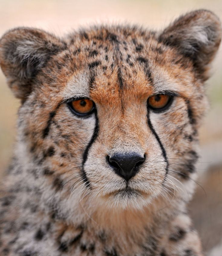

In [3]:
Image.open(get_image("Cheetah_face", max_n=1)).to_thumb(256, 256)

Let's have a look in Leopard face.

Searching for leopard


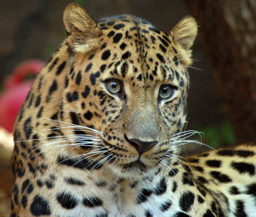

In [4]:
Image.open(get_image("leopard", max_n=1)).to_thumb(256, 256)

## Pattern on their coat

Another key difference is Patterns over them, they may look like same, but in actual fact, a leopard has rosettes which are rose-like markings, and cheetahs have a solid round or oval spot shape.
Let's have a look.

Searching for leopard_skin


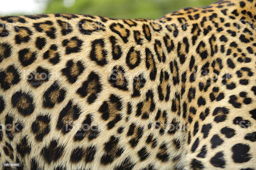

In [18]:
Image.open(get_image("leopard_skin", max_n=1)).to_thumb(256, 256)

Searching for cheetah_skin


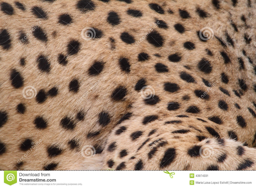

In [17]:
Image.open(get_image("cheetah_skin", max_n=5)).to_thumb(256, 256)

# Download Data

Let's now download data.

In [19]:
searches = "Cheetah", "Leopard"
path = Path("cheetah_or_not")
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"{o} photo", max_images=200))

Searching for Cheetah photo
Searching for Leopard photo


Lets get the list containing image files in path.

In [20]:
fns = get_image_files(path)
fns

(#370) [Path('cheetah_or_not/Cheetah/9208f016-b294-4ff5-a6f9-4ff96a11121d.jpg'),Path('cheetah_or_not/Cheetah/6c7f472f-484b-409a-a2ba-193089564145.jpg'),Path('cheetah_or_not/Cheetah/e6f45e84-82b2-4756-86df-efe936d8288c.jpg'),Path('cheetah_or_not/Cheetah/c3569fd2-22db-4b37-9444-fac738eebd16.jpg'),Path('cheetah_or_not/Cheetah/912150a7-14bc-485f-9c92-c969f585eaaa.jpg'),Path('cheetah_or_not/Cheetah/079f086a-7a84-4035-b771-e15d994f0293.jpg'),Path('cheetah_or_not/Cheetah/1e6e0761-bdbb-4266-89b6-9db8e80bf48c.jpg'),Path('cheetah_or_not/Cheetah/cac82d45-3028-49c6-a49e-8718d65bbb9c.jpg'),Path('cheetah_or_not/Cheetah/5f70a604-7f3e-430f-b957-f64947e7b2f4.jpg'),Path('cheetah_or_not/Cheetah/9c4b3124-3f6f-4ffc-bae1-aa16f02a7619.jpg')...]

Deleting files failed to open.

In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


4

Let's create a template for the dataloaders with DataBlock.

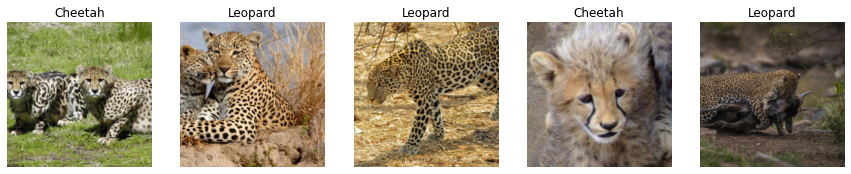

In [22]:
template = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)
dls = template.dataloaders(path)
dls.show_batch(max_n=5, nrows=1)

# Let's Train our model(Resnet50)

In [24]:
model_01 = vision_learner(dls, resnet50, metrics=error_rate)
model_01.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.913502,0.326423,0.095890,00:20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


epoch,train_loss,valid_loss,error_rate,time
0,0.175672,0.191224,0.013699,00:20
1,0.125082,0.145476,0.013699,00:20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


# Confusion Matrix
Well ! this model is trained to have more than 98% accuracy with an error rate of 1.3% that is quite great. We can draw conusion matrix to see model perfoemance.

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


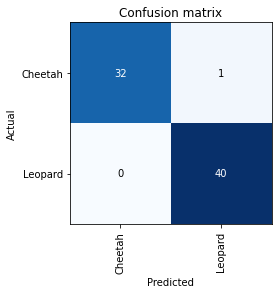

In [26]:
interp = ClassificationInterpretation.from_learner(model_01)
interp.plot_confusion_matrix()

As we can see everytime this model predicted correctly except for wher it was 'Cheetah' and it predicted 'Leopard'.

# Prediction
let's make a prediction functoin which takes image and output the label and probability.


In [27]:
def Predict(im):
  pred, pred_idx, probs = model_01.predict(im)
  return f"Prediction: {pred}, Probabilty: {probs[pred_idx]}"

Now, Let's get an image and predict.

Searching for cheetah


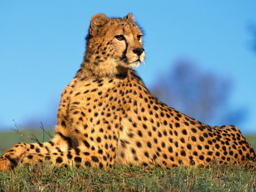

In [29]:
img = get_image("cheetah")
Image.open(img).to_thumb(256, 256)

Let's model predict the above image.

In [30]:
Predict(img)

'Prediction: Cheetah, Probabilty: 1.0'

Wow ! 100% accurate. That is great. Awesome model. 
Imagine having high tech "goggles" and we can apply deep learnings model to it. That would be really cool.

Thanks for reading. I hope enjoy this project.